In [1]:
from proj1_helpers import *
from implementations import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y_tr, x_tr, ids_tr = load_csv_data("../../train.csv")
y_te, x_te, ids_te = load_csv_data("../../test.csv")

In [ ]:
(vals, ve) = np.linalg.eig(np.cov(x_tr.T))
impo_tr = ve[:10,:]
x_tr = x_tr @ impo_tr.T

In [ ]:
(vals, ve) = np.linalg.eig(np.cov(x_te.T))
impo_te = ve[:10,:]
x_te = x_te @ impo_te.T

In [3]:
def prediction_score(pred, y):
    res = np.sum(np.abs(pred + y) / 2.0)
    return res / len(pred)

In [4]:
triage(x_tr)
triage(x_te)

In [5]:
meanx = np.mean(x_tr, axis=0)
meanx.shape
stdx = np.std(x_tr, axis=0)
stdx.shape
tx = (x_tr-meanx)/stdx
tx.shape

(250000, 30)

In [5]:
x_r = standardize(x_tr)
x_e = standardize(x_te)
print(x_r.shape)

(250000, 30)


In [ ]:
def visualization(lambds, score):
    """visualization the curves of mse_tr and mse_te."""
    plt.semilogx(lambds, score, marker=".", color='b', label='train error')
    plt.xlabel("lambda")
    plt.ylabel("score")
    plt.title("visualization")
    plt.legend(loc=2)
    plt.grid(True)
    plt.savefig("cross_validation")
    plt.show()

Logistic regression to find the best gamma

lambda=1e-20, loss=0.74533, score=0.81516
lambda=2.559547922699533e-20, loss=0.74533, score=0.81516
lambda=6.551285568595496e-20, loss=0.74533, score=0.81516
lambda=1.6768329368110032e-19, loss=0.74533, score=0.81516
lambda=4.291934260128761e-19, loss=0.74533, score=0.81516
lambda=1.0985411419875618e-18, loss=0.74533, score=0.81516
lambda=2.8117686979742367e-18, loss=0.74533, score=0.81516
lambda=7.19685673001153e-18, loss=0.74533, score=0.815164
lambda=1.8420699693267164e-17, loss=0.74533, score=0.815156
lambda=4.7148663634573897e-17, loss=0.74533, score=0.81516
lambda=1.2067926406393265e-16, loss=0.74533, score=0.815188
lambda=3.0888435964774847e-16, loss=0.74533, score=0.8152
lambda=7.906043210907702e-16, loss=0.74533, score=0.81518
lambda=2.0235896477251554e-15, loss=0.74533, score=0.815188
lambda=5.179474679231223e-15, loss=0.74533, score=0.81518
lambda=1.3257113655901108e-14, loss=0.74533, score=0.815188
lambda=3.39322177189533e-14, loss=0.74533, score=0.815212
lambda=8.685113737

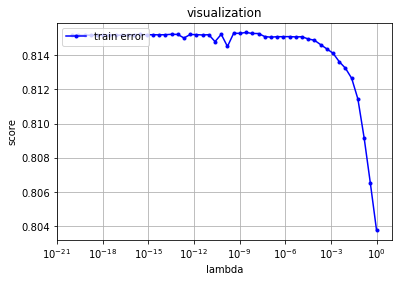

In [11]:
lambdas = np.logspace(-20, 0, 50)
degree = 9
x_trained = build_poly(x_tr, degree)
scores = []
for lambda_ in lambdas:
    w, loss = ridge_regression(y_tr, x_trained, lambda_)
    y_pred_sc = predict_labels(w, x_trained)
    score = prediction_score(y_pred_sc, y_tr)
    scores.append(score)
    print("lambda={d}, loss={tr:.5f}, score={s}".format(
       d=lambda_, tr=loss, s=score))
visualization(lambdas, scores)

C:\Users\Alvaro\Desktop\ml-groupwork\project1\scripts\implementations.py:60: RuntimeWarning: overflow encountered in exp
  return np.exp(t) / (1 + np.exp(t))
C:\Users\Alvaro\Desktop\ml-groupwork\project1\scripts\implementations.py:60: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(t) / (1 + np.exp(t))
C:\Users\Alvaro\Desktop\ml-groupwork\project1\scripts\implementations.py:65: RuntimeWarning: divide by zero encountered in log
  vector_loss = y.T.dot(np.log(sigmo)) + (1 - y).T.dot(np.log(1 - sigmo))
C:\Users\Alvaro\Desktop\ml-groupwork\project1\scripts\proj1_helpers.py:90: RuntimeWarning: invalid value encountered in less_equal
  y_pred[np.where(y_pred <= 0)] = -1
C:\Users\Alvaro\Desktop\ml-groupwork\project1\scripts\proj1_helpers.py:91: RuntimeWarning: invalid value encountered in greater
  y_pred[np.where(y_pred > 0)] = 1


gamma=0.01, loss=nan, score=nan
gamma=0.001, loss=nan, score=nan


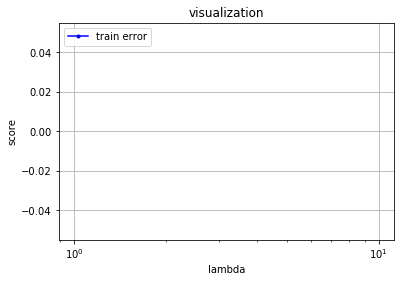

In [9]:
max_iters = 500
degree = 9
gammas = [0.01, 0.001]
x_trained = build_poly(x_tr, degree)
scores = []
for gamma in gammas:
    w = np.zeros(x_trained.shape[1])
    w, loss = logistic_regression(y_tr, x_trained, w, max_iters, gamma)
    y_pred_sc = predict_labels(w, x_trained)
    score = prediction_score(y_pred_sc, y_tr)
    scores.append(score)
    print("gamma={d}, loss={tr:.5f}, score={s}".format(
       d=gamma, tr=loss, s=score))
visualization(gammas, scores)

In [7]:
for degree in range(15):
    # Use degree to create polynomials of given degree.
    x_trained = build_poly(x_r, degree)
    x_tested = build_poly(x_e, degree)

    # Use least squares to the w for predictions.
    w, loss = least_squares(y_tr, x_trained)
    #w, loss = logistic_regression(y_tr, x_trained, w, 10, 0.01)

    # Get predictions.
    y_pred = predict_labels(w, x_tested)
    
    print("degree={d}, loss={tr:.5f}".format(
       d=degree, tr=loss))

degree=0, loss=0.45049
degree=1, loss=0.34041
degree=2, loss=0.31553
degree=3, loss=0.30477
degree=4, loss=0.29924
degree=5, loss=0.29640
degree=6, loss=0.29393
degree=7, loss=0.28865
degree=8, loss=0.28473
degree=9, loss=0.27773
degree=10, loss=0.27618
degree=11, loss=0.27439
degree=12, loss=0.27282
degree=13, loss=0.27700
degree=14, loss=0.27118


In [26]:
# Use degree to create polynomials of given degree.
degree = 9 #0.277
x_trained = build_poly(x_tr, degree)
x_tested = build_poly(x_te, degree)

# Use least squares to the w for predictions.
w, loss = least_squares(y_tr, x_trained)

# Get predictions.
y_pred = predict_labels(w, x_tested)

In [27]:
y_pred_sc = predict_labels(w, x_trained)
score = prediction_score(y_pred_sc, y_tr)
score

0.81516

In [25]:
for degree in range(15):
    lambda_ = 2.6826957952797275e-09

    x_trained = build_poly(x_r, degree)
    x_tested = build_poly(x_e, degree)

    w, loss = ridge_regression(y_tr, x_trained, lambda_)
    
    print("degree={d}, loss={tr:.5f}".format(
       d=degree, tr=loss))


degree=0, loss=0.94920
degree=1, loss=0.82512
degree=2, loss=0.79439
degree=3, loss=0.78073
degree=4, loss=0.77362
degree=5, loss=0.76994
degree=6, loss=0.76672
degree=7, loss=0.75980
degree=8, loss=0.75504
degree=9, loss=0.74529
degree=10, loss=0.74317
degree=11, loss=0.74074
degree=12, loss=0.73828
degree=13, loss=0.75020
degree=14, loss=0.73557


In [ ]:
# Use degree to create polynomials of given degree.0.81318000000000001
degree = 9
lambda_ = 2.6826957952797275e-09
iters = 5000
gammas = [0.01, 0.1]
scores = []
x_trained = build_poly(x_tr, degree)
x_tested = build_poly(x_te, degree)
for gamma in gammas:
    w = np.zeros(x_trained.shape[1])
    w, loss = reg_logistic_regression(y_tr, x_trained,lambda_, w, iters, gamma)
    y_pred_sc = predict_labels(w, x_trained)
    score = prediction_score(y_pred_sc, y_tr)
    scores.append(score)
    print("lambda={d}, loss={tr:.5f}, score={s}".format(
       d=gamma, tr=loss, s=score))
visualization(gammas, scores)

173286.79514
nan


C:\Users\Alvaro\Desktop\ml-groupwork\project1\scripts\implementations.py:60: RuntimeWarning: overflow encountered in exp
  return np.exp(t) / (1 + np.exp(t))
C:\Users\Alvaro\Desktop\ml-groupwork\project1\scripts\implementations.py:60: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(t) / (1 + np.exp(t))
C:\Users\Alvaro\Desktop\ml-groupwork\project1\scripts\implementations.py:65: RuntimeWarning: divide by zero encountered in log
  vector_loss = y.T.dot(np.log(sigmo)) + (1 - y).T.dot(np.log(1 - sigmo))


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [34]:
    y_pred_sc = predict_labels(w, x_trained)
    print(y_pred_sc)
    score = prediction_score(y_pred_sc, y_tr)
    print(score)

[-1.  1.  1. ...,  1.  1.  1.]
0.396576


In [29]:
x_trained = build_poly(x_r, degree)
x_tested = build_poly(x_e, degree)

In [16]:
def cross_validation(y, x, k_indices, k, lambda_, degree):
    """"return the loss of ridge regression."""
    # get k'th subgroup in test, others in train
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    tr_indice = tr_indice.reshape(-1)
    y_te = y[te_indice]
    y_tr = y[tr_indice]
    x_tes = x[te_indice]
    x_tra = x[tr_indice]
    # ridge regression
    w, _ = ridge_regression(y_tr, x_tra, lambda_)
    # calculate the loss for train and test data
    loss_tr = np.sqrt(2 * compute_mse(y_tr, x_tra, w))
    loss_te = np.sqrt(2 * compute_mse(y_te, x_tes, w))
    return loss_tr, loss_te

In [22]:
def cross_validation_visualization1(lambds, mse):
    """visualization the curves of mse_tr and mse_te."""
    plt.semilogx(lambds, mse, marker=".", color='b', label='train error')
    plt.xlabel("lambda")
    plt.ylabel("rmse")
    plt.title("cross validation")
    plt.legend(loc=2)
    plt.grid(True)
    plt.savefig("cross_validation")
    plt.show()

In [23]:
def cross_validation_visualization2(lambds, mse):
    """visualization the curves of mse_tr and mse_te."""
    plt.semilogx(lambds, mse, marker=".", color='r', label='test error')
    plt.xlabel("lambda")
    plt.ylabel("rmse")
    plt.title("cross validation")
    plt.legend(loc=2)
    plt.grid(True)
    plt.savefig("cross_validation")
    plt.show()

In [14]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)

In [20]:
def cross_validation_demo():
    seed = 1
    degree = 9
    k_fold = 8
    lambdas = np.logspace(-20, 0, 50)
    # split data in k fold
    k_indices = build_k_indices(y_tr, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # cross validation
    for lambda_ in lambdas:
        rmse_tr_tmp = []
        rmse_te_tmp = []
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(y_tr, x_trained, k_indices, k, lambda_, degree)
            rmse_tr_tmp.append(loss_tr)
            rmse_te_tmp.append(loss_te)
        rmse_tr.append(np.mean(rmse_tr_tmp))
        rmse_te.append(np.mean(rmse_te_tmp))
        print("lambda={l}, rmse_tr={tr:.5f}, rmse_te={te:.5f}".format(
       l=lambda_, tr=np.mean(rmse_tr_tmp), te=np.mean(rmse_te_tmp)))

    cross_validation_visualization1(lambdas, rmse_tr)
    cross_validation_visualization2(lambdas, rmse_te)

    

lambda=1e-20, rmse_tr=0.74754, rmse_te=384425131.24873
lambda=2.559547922699533e-20, rmse_tr=0.74754, rmse_te=384425131.24873
lambda=6.551285568595496e-20, rmse_tr=0.74754, rmse_te=384425131.24873
lambda=1.6768329368110032e-19, rmse_tr=0.74754, rmse_te=384425131.24873
lambda=4.291934260128761e-19, rmse_tr=0.74754, rmse_te=384425131.24873
lambda=1.0985411419875618e-18, rmse_tr=0.74754, rmse_te=384425131.24873
lambda=2.8117686979742367e-18, rmse_tr=0.74754, rmse_te=384425028.10415
lambda=7.19685673001153e-18, rmse_tr=0.74754, rmse_te=384425384.38779
lambda=1.8420699693267164e-17, rmse_tr=0.74754, rmse_te=384425230.49599
lambda=4.7148663634573897e-17, rmse_tr=0.74753, rmse_te=384425715.39563
lambda=1.2067926406393265e-16, rmse_tr=0.74754, rmse_te=384399879.38622
lambda=3.0888435964774847e-16, rmse_tr=0.74745, rmse_te=384563178.27828
lambda=7.906043210907702e-16, rmse_tr=0.74728, rmse_te=384652542.50630
lambda=2.0235896477251554e-15, rmse_tr=0.74728, rmse_te=384582676.39941
lambda=5.179474

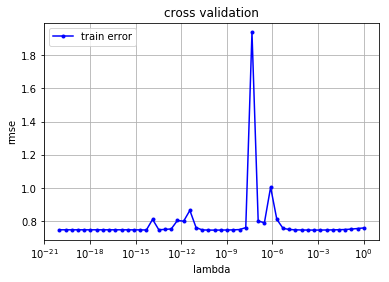

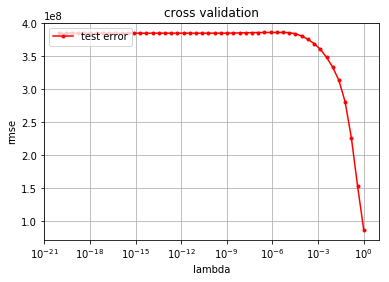

In [24]:
cross_validation_demo()